In [1]:
import sys
from pathlib import Path
import pandas as pd

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

path_data = f'..\data\{date_str}_df_finviz_merged.parquet'

path_corr = f'..\data\{date_str}_df_corr_matrix.parquet'
path_cov = f'..\data\{date_str}_df_cov_matrix.parquet'
path_output = f'..\picks\{date_str}_portf.txt'

path_corr_emv = f'..\data\{date_str}_df_corr_emv_matrix.parquet'
path_cov_emv = f'..\data\{date_str}_df_cov_emv_matrix.parquet'
path_output_emv = f'..\picks\{date_str}_portf_emv.txt'

print(utils.__file__)  # Should point to your src/utils.py
print(f'path_data: {path_data}')
print(f'path_corr: {path_corr}')
print(f'path_cov: {path_cov}')  
print(f'path_output: {path_output}')
print(f'path_corr_emv: {path_corr_emv}')
print(f'path_cov_emv: {path_cov_emv}')
print(f'path_output_emv: {path_output_emv}')
print((f'date_str: {date_str}'))



Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']
c:\Users\ping\Files_win10\python\py311\stocks\src\utils.py
path_data: ..\data\2025-04-24_df_finviz_merged.parquet
path_corr: ..\data\2025-04-24_df_corr_matrix.parquet
path_cov: ..\data\2025-04-24_df_cov_matrix.parquet
path_output: ..\picks\2025-04-24_portf.txt
path_co

In [25]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [3]:
df_data = pd.read_parquet(path_data)
df_data.head() 

,Company,Info,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,...,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3130150.0,1.28,51.38,-16.79,7.874301,7.26,-6.87,-6.84,...,1.035777,-0.959386,-1.385720,0.828292,-0.425439,-0.608698,0.917755,0.684005,1.017773,1.143601
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2879180.0,0.98,53.88,-8.11,7.846959,4.22,-1.99,-13.30,...,1.111159,-1.537405,-2.274422,0.745459,-0.731476,-1.042875,0.871605,-0.127336,-0.178297,0.977115
NVDA,NVIDIA Corp,"Technology, Semiconductors",2596890.0,2.11,48.24,-20.75,9.823548,1.86,-11.82,-27.71,...,0.904566,-0.625430,-0.909428,0.897632,-0.637198,-0.869139,0.894302,0.660154,0.956329,1.119004
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1979630.0,1.30,50.46,-14.97,11.486971,7.00,-9.32,-20.76,...,0.944301,-2.041093,-2.803506,0.702880,-0.080315,-0.116866,0.986374,0.264265,0.374757,1.047185
GOOGL,Alphabet Inc,"Communication Services, Internet Content & Inf...",1954980.0,1.00,51.72,-15.86,7.862125,3.88,-6.61,-19.55,...,0.957297,-2.007801,-2.674631,0.718109,-0.441518,-0.629798,0.928965,0.113549,0.163962,1.020074


In [4]:
df_data = pd.read_parquet(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
# df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)


df_corr = pd.read_parquet(path_corr)
df_cov = pd.read_parquet(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1136
count_after above threshold (0.75): 927
Percentage above threshold (0.75): 81.60%

df_cov.shape: (1136, 1136)


Symbol,A,AA,AAL,AAON,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,...,YUMC,Z,ZBH,ZG,ZION,ZM,ZS,ZTO,ZTS,ZWS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,0.000349,0.000224,0.000253,0.000221,0.000158,0.000099,0.000056,0.000160,0.000062,0.000067,...,0.000178,0.000232,0.000080,0.000236,0.000157,0.000143,0.000203,0.000128,0.000129,0.000168
AA,0.000224,0.001108,0.000447,0.000352,0.000278,0.000071,0.000131,0.000325,0.000004,0.000098,...,0.000402,0.000351,0.000078,0.000355,0.000339,0.000186,0.000356,0.000271,0.000141,0.000277
AAL,0.000253,0.000447,0.001120,0.000375,0.000302,0.000078,0.000115,0.000400,0.000052,0.000116,...,0.000200,0.000324,0.000062,0.000324,0.000392,0.000227,0.000323,0.000170,0.000156,0.000282
AAON,0.000221,0.000352,0.000375,0.001141,0.000162,-0.000035,-0.000009,0.000203,-0.000005,0.000078,...,0.000052,0.000292,0.000020,0.000292,0.000292,0.000203,0.000357,0.000016,0.000043,0.000218
AAPL,0.000158,0.000278,0.000302,0.000162,0.000428,0.000077,0.000089,0.000261,0.000025,0.000082,...,0.000134,0.000246,0.000034,0.000245,0.000200,0.000145,0.000285,0.000101,0.000111,0.000162



df_corr.shape: (1136, 1136)


Symbol,A,AA,AAL,AAON,AAPL,ABBV,ABEV,ABNB,ABT,ACGL,...,YUMC,Z,ZBH,ZG,ZION,ZM,ZS,ZTO,ZTS,ZWS
Symbol,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.863155,0.805534,0.805680,0.867221,0.769512,0.566037,0.816606,0.526969,0.618259,...,0.578121,0.804748,0.557735,0.804240,0.762893,0.864562,0.804949,0.704371,0.880306,0.838207
AA,0.863155,1.000000,0.734059,0.683739,0.783231,0.605701,0.461787,0.805677,0.373544,0.506373,...,0.645808,0.725547,0.396614,0.734104,0.665761,0.806567,0.806886,0.645648,0.715396,0.780644
AAL,0.805534,0.734059,1.000000,0.749039,0.826238,0.526416,0.470940,0.878011,0.328966,0.455384,...,0.330671,0.810355,0.206762,0.821724,0.768879,0.762651,0.800726,0.586947,0.780979,0.691998
AAON,0.805680,0.683739,0.749039,1.000000,0.804500,0.550423,0.427078,0.778361,0.316355,0.564013,...,0.319927,0.739596,0.506567,0.743982,0.655157,0.817678,0.819039,0.528625,0.695308,0.734152
AAPL,0.867221,0.783231,0.826238,0.804500,1.000000,0.704155,0.611031,0.880107,0.426061,0.677236,...,0.555024,0.823097,0.441370,0.825944,0.741486,0.849058,0.817879,0.740737,0.894387,0.788123



df_data.shape: (927, 62)


,Company,Info,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,...,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3130150.0,1.28,51.38,-16.79,7.874301,7.26,-6.87,-6.84,...,1.035777,-0.959386,-1.385720,0.828292,-0.425439,-0.608698,0.917755,0.684005,1.017773,1.143601
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2879180.0,0.98,53.88,-8.11,7.846959,4.22,-1.99,-13.30,...,1.111159,-1.537405,-2.274422,0.745459,-0.731476,-1.042875,0.871605,-0.127336,-0.178297,0.977115
NVDA,NVIDIA Corp,"Technology, Semiconductors",2596890.0,2.11,48.24,-20.75,9.823548,1.86,-11.82,-27.71,...,0.904566,-0.625430,-0.909428,0.897632,-0.637198,-0.869139,0.894302,0.660154,0.956329,1.119004
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1979630.0,1.30,50.46,-14.97,11.486971,7.00,-9.32,-20.76,...,0.944301,-2.041093,-2.803506,0.702880,-0.080315,-0.116866,0.986374,0.264265,0.374757,1.047185
GOOGL,Alphabet Inc,"Communication Services, Internet Content & Inf...",1954980.0,1.00,51.72,-15.86,7.862125,3.88,-6.61,-19.55,...,0.957297,-2.007801,-2.674631,0.718109,-0.441518,-0.629798,0.928965,0.113549,0.163962,1.020074


,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,...,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,9.270000e+02,927.000000,927.000000,927.000000,927.000000,927.00000,927.000000,927.000000,927.000000,926.000000,...,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,6.818516e+04,1.057389,52.208393,-2.281273,6.220871,4.92480,-4.289763,-6.903905,-2.892147,15.948283,...,1.096551,-0.369374,-0.372783,0.964720,-0.059229,0.014901,1.004353,0.321784,0.551091,1.074296
std,2.204749e+05,0.532089,6.720747,17.829541,5.310446,5.42654,8.461075,16.331404,22.282782,65.226194,...,0.320065,1.451936,2.093352,0.271265,1.004524,1.469446,0.189047,0.821019,1.270251,0.168788
min,5.480000e+03,-1.160000,28.390000,-54.680000,-14.730550,-27.48000,-28.260000,-55.290000,-54.940000,-85.590000,...,0.377228,-4.291509,-4.925917,0.472756,-2.972111,-3.486520,0.579496,-1.947266,-2.459233,0.691339
25%,1.019500e+04,0.720000,48.195000,-13.485000,2.953816,1.81500,-9.555000,-17.665000,-16.895000,-12.715000,...,0.887878,-1.379857,-1.837858,0.775139,-0.735946,-1.015299,0.869536,-0.244414,-0.330005,0.953898
50%,2.034000e+04,1.020000,51.800000,-3.760000,5.952381,4.69000,-4.720000,-8.110000,-5.810000,7.980000,...,1.035749,-0.536694,-0.769187,0.907141,-0.135447,-0.195738,0.975629,0.338064,0.481288,1.064346
75%,5.303000e+04,1.300000,56.220000,7.870000,8.839364,7.46000,0.415000,3.165000,7.865000,26.740000,...,1.235692,0.508647,0.736518,1.093021,0.618701,0.912964,1.120056,0.862687,1.287524,1.170276
max,3.130150e+06,5.060000,78.990000,105.660000,45.519429,59.22000,81.320000,52.870000,152.410000,1014.350000,...,2.616280,4.805667,10.322897,2.450509,3.165998,5.137385,1.740472,2.661730,6.251183,1.799997


In [5]:
# Check df_corr
has_nan_corr = df_corr.isnull().any().any()
print(f"Are there any NaNs in df_corr? {has_nan_corr}")

# Check df_cov
has_nan_cov = df_cov.isnull().any().any()
print(f"Are there any NaNs in df_cov? {has_nan_cov}")

Are there any NaNs in df_corr? False
Are there any NaNs in df_cov? False


In [6]:
print(f'df_data.columns:\n{df_data.columns}')
print(f'\ndf_data.describe():\n{df_data.describe()}')
print(f'\ndf_data.head():\n{df_data.head()}')
print(f'\ndf_data.info():')
print(f'{df_data.info()}')

df_data.columns:
Index(['Company', 'Info', 'MktCap, M', 'Beta', 'RSI', 'Perf YTD %',
       'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %',
       'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %',
       '50D High %', '50D Low %', '52W High %', '52W Low %', 'All-Time High %',
       'All-Time Low %', 'ATR', 'ATR/Price %', 'Volatility W %',
       'Volatility M %', 'Volume, M', 'Avg Volume, M', 'Rel Volume', 'Price',
       'Change %', 'Dividend %', 'Fwd P/E', 'P/S', 'P/B', 'P/FCF', 'ROE %',
       'Debt/Eq', 'Oper M %', 'Sharpe 3d', 'Sortino 3d', 'Omega 3d',
       'Sharpe 5d', 'Sortino 5d', 'Omega 5d', 'Sharpe 10d', 'Sortino 10d',
       'Omega 10d', 'Sharpe 15d', 'Sortino 15d', 'Omega 15d', 'Sharpe 30d',
       'Sortino 30d', 'Omega 30d', 'Sharpe 60d', 'Sortino 60d', 'Omega 60d',
       'Sharpe 120d', 'Sortino 120d', 'Omega 120d', 'Sharpe 250d',
       'Sortino 250d', 'Omega 250d'],
      dtype='object')

df_data.describe():
          MktCap, M        Beta  

In [8]:
df_data

,Company,Info,"MktCap, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,...,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",3130150.0,1.28,51.38,-16.79,7.874301,7.26,-6.87,-6.84,...,1.035777,-0.959386,-1.385720,0.828292,-0.425439,-0.608698,0.917755,0.684005,1.017773,1.143601
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2879180.0,0.98,53.88,-8.11,7.846959,4.22,-1.99,-13.30,...,1.111159,-1.537405,-2.274422,0.745459,-0.731476,-1.042875,0.871605,-0.127336,-0.178297,0.977115
NVDA,NVIDIA Corp,"Technology, Semiconductors",2596890.0,2.11,48.24,-20.75,9.823548,1.86,-11.82,-27.71,...,0.904566,-0.625430,-0.909428,0.897632,-0.637198,-0.869139,0.894302,0.660154,0.956329,1.119004
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1979630.0,1.30,50.46,-14.97,11.486971,7.00,-9.32,-20.76,...,0.944301,-2.041093,-2.803506,0.702880,-0.080315,-0.116866,0.986374,0.264265,0.374757,1.047185
GOOGL,Alphabet Inc,"Communication Services, Internet Content & Inf...",1954980.0,1.00,51.72,-15.86,7.862125,3.88,-6.61,-19.55,...,0.957297,-2.007801,-2.674631,0.718109,-0.441518,-0.629798,0.928965,0.113549,0.163962,1.020074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HR,Healthcare Realty Trust Inc,"Real Estate, REIT - Healthcare Facilities",5520.0,0.91,44.63,-7.20,0.962773,0.19,-5.07,-5.92,...,0.824314,-0.767719,-1.037200,0.878549,-0.686757,-0.938957,0.893249,0.768427,1.138653,1.134187
HOMB,Home Bancshares Inc,"Financial, Banks - Regional",5520.0,0.77,56.04,-1.70,5.699088,7.08,-2.35,-7.39,...,1.013600,-0.925175,-1.170420,0.834461,0.164230,0.250519,1.033968,0.540308,0.826320,1.104752
JXN,Jackson Financial Inc,"Financial, Insurance - Life",5510.0,1.54,48.53,-12.29,8.325060,6.62,-13.86,-19.79,...,0.957264,-1.431016,-1.733432,0.775609,-0.964040,-1.260360,0.837109,0.426048,0.584930,1.082267


In [9]:
import pandas as pd
import numpy as np
import logging

# --- Configuration ---
# Define weights for scoring components (adjust based on testing)
# Focus on mean reversion and volume confirmation
SCORING_WEIGHTS = {
    'rsi': 0.40,        # Weight for RSI (lower is better)
    'change': 0.30,     # Weight for previous day change (more negative is better)
    'rel_volume': 0.20, # Weight for relative volume (higher is better)
    'volatility': 0.10  # Weight for ATR/Price % (lower is better)
}

# Define Filters (adjust thresholds based on testing/preference)
FILTERS = {
    'min_price': 5.0,            # Minimum stock price
    'min_avg_volume_m': 0.5,     # Minimum average daily volume in Millions
    'min_roe_pct': 0.0,          # Minimum Return on Equity % (e.g., > 0)
    'max_debt_eq': 2.0           # Maximum Debt/Equity ratio
}

# Define a small epsilon for safe division
EPSILON = 1e-9

# --- Helper Functions ---

def setup_logging(log_filepath="short_term_selector.log"):
    """Configures basic logging."""
    log_dir = os.path.dirname(log_filepath)
    if log_dir and not os.path.exists(log_dir):
        os.makedirs(log_dir)
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(log_filepath, mode='w'),
            logging.StreamHandler()
        ]
    )
    logging.info(f"Logging configured. Output file: {log_filepath}")

def z_score_series(series):
    """Calculates Z-score for a pandas Series, handling NaNs and zero std dev."""
    mean = series.mean()
    std = series.std()
    if std < EPSILON: # Handle cases with zero standard deviation
        return pd.Series(0.0, index=series.index)
    else:
        return (series - mean) / std

# --- Main Selection Function ---

def select_short_term_stocks(
    df_data,
    df_cov, # Required for InverseVolatility weighting
    n_select=20,
    weighting_scheme='EqualWeight', # Options: 'EqualWeight', 'InverseVolatility'
    filters=FILTERS,
    scoring_weights=SCORING_WEIGHTS):
    """
    Selects stocks with potential for positive returns over the next 1-2 days,
    focusing on mean reversion and volume confirmation.

    Args:
        df_data (pd.DataFrame): DataFrame with stock metrics (must include columns
                                used in filters and scoring). Index should be Ticker.
        df_cov (pd.DataFrame): Covariance matrix (Index=Ticker, Columns=Ticker).
                               Needed only for 'InverseVolatility' weighting.
        n_select (int): Number of top stocks to select.
        weighting_scheme (str): 'EqualWeight' or 'InverseVolatility'.
        filters (dict): Dictionary defining filter thresholds.
        scoring_weights (dict): Dictionary defining weights for scoring components.

    Returns:
        pd.DataFrame: DataFrame with selected tickers as index and 'Weight' column.
                      Returns empty DataFrame on failure or if no stocks pass filters.
    """
    logging.info("--- Starting Short-Term Stock Selection ---")
    logging.info(f"Parameters: n_select={n_select}, weighting='{weighting_scheme}'")
    logging.info(f"Filters: {filters}")
    logging.info(f"Scoring Weights: {scoring_weights}")

    if not isinstance(df_data, pd.DataFrame) or df_data.empty:
        logging.error("Input df_data is not a valid DataFrame or is empty.")
        return pd.DataFrame(columns=['Weight'])

    df = df_data.copy()

    # --- 1. Data Preparation and Cleaning ---
    required_cols = [
        'Price', 'Avg Volume, M', 'ROE %', 'Debt/Eq', # Filters
        'RSI', 'Change %', 'Rel Volume', 'ATR/Price %' # Scoring
    ]
    if weighting_scheme == 'InverseVolatility':
        # Volatility can be taken from df_data or df_cov diagonal
        # Using df_data['Volatility M %'] as an example, adjust if needed
        required_cols.append('Volatility M %') # Ensure this column exists

    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        logging.error(f"Missing required columns in df_data: {missing_cols}")
        return pd.DataFrame(columns=['Weight'])

    # Convert relevant columns to numeric just in case, coercing errors
    for col in required_cols:
        if not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaNs in essential columns used for filtering/scoring
    initial_count = len(df)
    df.dropna(subset=required_cols, inplace=True)
    cleaned_count = len(df)
    logging.info(f"Cleaned data: Removed {initial_count - cleaned_count} rows with NaNs in required columns. {cleaned_count} remaining.")

    if cleaned_count == 0:
        logging.warning("No stocks remaining after NaN cleaning.")
        return pd.DataFrame(columns=['Weight'])

    # --- 2. Filtering ---
    logging.info("Applying filters...")
    filter_mask = (
        (df['Price'] >= filters['min_price']) &
        (df['Avg Volume, M'] >= filters['min_avg_volume_m']) &
        (df['ROE %'] >= filters['min_roe_pct']) &
        (df['Debt/Eq'] <= filters['max_debt_eq'])
    )
    df_filtered = df[filter_mask].copy()
    filtered_count = len(df_filtered)
    logging.info(f"Filtering complete: {filtered_count} stocks passed filters.")

    if filtered_count == 0:
        logging.warning("No stocks passed the filtering criteria.")
        return pd.DataFrame(columns=['Weight'])
    elif filtered_count < n_select:
        logging.warning(f"Only {filtered_count} stocks passed filters, which is less than n_select ({n_select}). Selecting all {filtered_count}.")
        n_select = filtered_count # Adjust n_select

    # --- 3. Scoring ---
    logging.info("Calculating component scores (Z-scores)...")
    scores_df = pd.DataFrame(index=df_filtered.index)

    # Calculate Z-scores for each component
    scores_df['z_rsi'] = z_score_series(df_filtered['RSI'])
    scores_df['z_change'] = z_score_series(df_filtered['Change %'])
    scores_df['z_rel_volume'] = z_score_series(df_filtered['Rel Volume'])
    scores_df['z_volatility'] = z_score_series(df_filtered['ATR/Price %'])

    # Combine scores based on weights and desired directionality
    # We want LOW RSI, LOW Change% (more negative), HIGH Rel Volume, LOW Volatility
    # Multiply Z-scores by -1 for factors where lower is better before applying positive weight
    logging.info("Calculating final composite score...")
    final_score = (
        scores_df['z_rsi'] * scoring_weights['rsi'] * (-1) +          # Lower RSI -> Higher Score
        scores_df['z_change'] * scoring_weights['change'] * (-1) +    # Lower Change% -> Higher Score
        scores_df['z_rel_volume'] * scoring_weights['rel_volume'] * (1) + # Higher RelVol -> Higher Score
        scores_df['z_volatility'] * scoring_weights['volatility'] * (-1) # Lower Volatility -> Higher Score
    )
    df_filtered['final_score'] = final_score

    # --- 4. Ranking & Selection ---
    logging.info(f"Ranking stocks by final_score and selecting top {n_select}...")
    df_ranked = df_filtered.sort_values('final_score', ascending=False)
    df_selected = df_ranked.head(n_select).copy()

    # --- 5. Weighting ---
    logging.info(f"Applying '{weighting_scheme}' weighting scheme...")
    if weighting_scheme == 'EqualWeight':
        df_selected['Weight'] = 1.0 / n_select

    elif weighting_scheme == 'InverseVolatility':
        # Extract volatility - using 'Volatility M %' as example
        # Alternatively, use diagonal from df_cov if aligned with df_selected.index
        vol_col_name = 'Volatility M %' # MAKE SURE THIS COLUMN IS IN df_data
        if vol_col_name not in df_selected.columns:
             logging.error(f"Required column '{vol_col_name}' for InverseVolatility weighting not found "
                           f"in selected stocks DataFrame. Falling back to EqualWeight.")
             df_selected['Weight'] = 1.0 / n_select
        else:
            volatility = df_selected[vol_col_name].copy()
            valid_vol_mask = volatility.notna() & (volatility > 0)
            num_invalid_vol = n_select - valid_vol_mask.sum()
            if num_invalid_vol > 0:
                 logging.warning(f"Found {num_invalid_vol} selected stocks with missing or non-positive "
                                 f"volatility. They will receive zero weight in InverseVolatility scheme.")
                 volatility.loc[~valid_vol_mask] = np.inf # Set vol to inf -> inv_vol becomes 0

            inv_vol = 1.0 / volatility
            inv_vol = inv_vol.replace([np.inf, -np.inf], 0) # Handle division by zero/inf

            total_inv_vol = inv_vol.sum()
            if total_inv_vol > EPSILON:
                df_selected['Weight'] = inv_vol / total_inv_vol
            else:
                logging.warning("Sum of inverse volatilities is near zero. Falling back to EqualWeight.")
                df_selected['Weight'] = 1.0 / n_select
    else:
        logging.error(f"Unknown weighting_scheme: '{weighting_scheme}'. Defaulting to EqualWeight.")
        df_selected['Weight'] = 1.0 / n_select

    # Final check on weights
    if 'Weight' in df_selected.columns:
         weight_sum = df_selected['Weight'].sum()
         if not np.isclose(weight_sum, 1.0):
              logging.warning(f"Final weights under scheme '{weighting_scheme}' do not sum close to 1.0 (Sum = {weight_sum:.6f}).")

    logging.info(f"Selected Stocks (Top 5):\n{df_selected.head(5)}")
    logging.info("--- Short-Term Stock Selection Finished ---")

    # Return only the Ticker (index) and Weight
    return df_selected[['Weight']]

In [13]:
import pandas as pd
import os # Assume df_data, df_cov are loaded pandas DataFrames

# Set up logging (optional but recommended)
# setup_logging("my_short_term_run.log")

# --- RUN SELECTION ---
# Example 1: Equal Weight
selected_portfolio_eq = select_short_term_stocks(
    df_data=df_data,   # Your DataFrame with metrics
    df_cov=df_cov,     # Your Covariance Matrix
    n_select=10,
    weighting_scheme='EqualWeight'
    # Optionally pass custom filters or scoring_weights dictionaries
    # filters = {...},
    # scoring_weights = {...}
)

# Example 2: Inverse Volatility Weight
selected_portfolio_iv = select_short_term_stocks(
    df_data=df_data,   # Make sure it has 'Volatility M %' or adjust code
    df_cov=df_cov,
    n_select=10,
    weighting_scheme='InverseVolatility'
)

# --- Display Results ---
if not selected_portfolio_eq.empty:
    print("\nSelected Portfolio (Equal Weight):")
    print(selected_portfolio_eq)

print('================================')

if not selected_portfolio_iv.empty:
    print("\nSelected Portfolio (Inverse Volatility):")
    print(selected_portfolio_iv)


Selected Portfolio (Equal Weight):
        Weight
Ticker        
FI         0.1
SRAD       0.1
LKQ        0.1
PG         0.1
JD         0.1
UNH        0.1
GPN        0.1
CHD        0.1
CMCSA      0.1
NOC        0.1

Selected Portfolio (Inverse Volatility):
          Weight
Ticker          
FI      0.085935
SRAD    0.055353
LKQ     0.101729
PG      0.139925
JD      0.092709
UNH     0.105139
GPN     0.068561
CHD     0.125885
CMCSA   0.110705
NOC     0.114060


In [10]:
zscore_df.to_parquet(f'..\data\{date_str}_zscore_df.parquet', engine='pyarrow', compression='zstd')
cluster_stats_df.to_parquet(f'..\data\{date_str}_cluster_stats_df.parquet', engine='pyarrow', compression='zstd')
detailed_clusters_df.to_parquet(f'..\data\{date_str}_detailed_clusters_df.parquet', engine='pyarrow', compression='zstd')

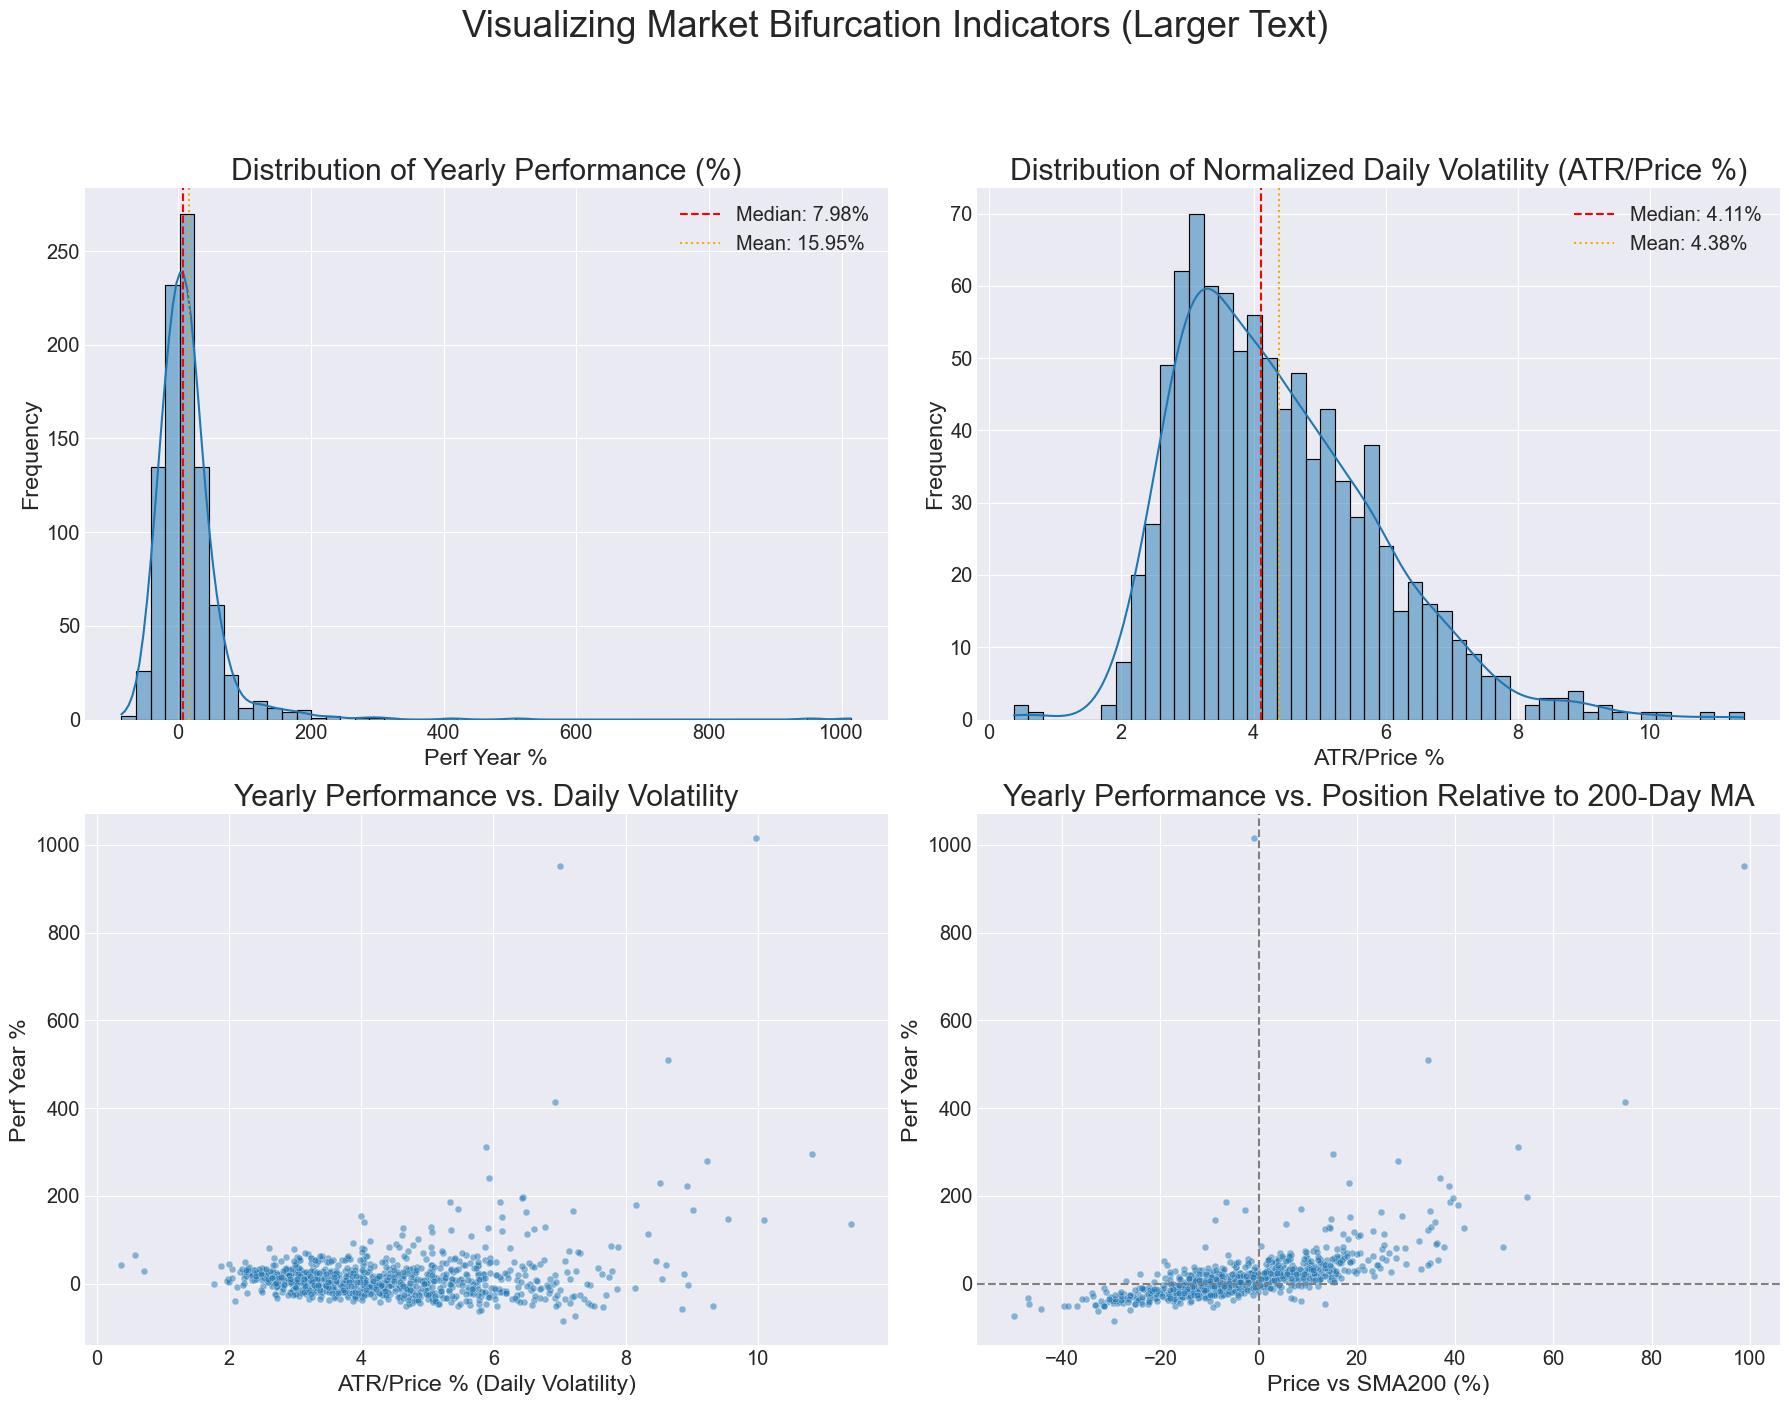

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [14]:
import pandas as pd
from typing import Optional # Optional for type hinting

def add_column_from_source(
    base_df: pd.DataFrame,
    source_df: pd.DataFrame,
    col_name_to_add: str,
    match_col_base: str = 'Ticker'
) -> pd.DataFrame:
    """
    Adds a specified column from a source DataFrame to a copy of a base DataFrame,
    matching rows based on a specified column in the base DataFrame and the *index*
    of the source DataFrame.

    Args:
        base_df (pd.DataFrame):
            The DataFrame to which the column will be added (a copy is made).
        source_df (pd.DataFrame):
            The DataFrame containing the column data to add. Its index MUST
            contain the keys for matching (e.g., Tickers corresponding to the
            values in `base_df[match_col_base]`).
        col_name_to_add (str):
            The string name of the column in `source_df` to retrieve data from.
        match_col_base (str, optional):
            The string name of the column in `base_df` containing the keys
            (e.g., Tickers) used for matching against the `source_df` index.
            Defaults to 'Ticker'.

    Returns:
        pd.DataFrame: A new DataFrame, which is a copy of `base_df` with the
                      `col_name_to_add` appended. Values are mapped based on
                      matching `base_df[match_col_base]` with `source_df.index`.
                      Returns NaN for the added column where no match is found
                      in the source index.

    Raises:
        KeyError: If `match_col_base` is not in `base_df.columns` or
                  if `col_name_to_add` is not in `source_df.columns`.
        TypeError: If mapping fails due to incompatible types or other issues.
    """
    # --- Input validation ---
    if match_col_base not in base_df.columns:
        raise KeyError(f"Matching column '{match_col_base}' not found in base_df columns: {base_df.columns.tolist()}")
    if col_name_to_add not in source_df.columns:
        raise KeyError(f"Column to add '{col_name_to_add}' not found in source_df columns: {source_df.columns.tolist()}")

    # --- Create a copy ---
    new_df = base_df.copy()

    # --- Perform the mapping ---
    # Retrieve the series to map from (the desired column in source_df)
    map_series = source_df[col_name_to_add]

    # Use the 'map' function on the matching column of the base DataFrame.
    # It looks up each value from new_df[match_col_base] in the index of map_series.
    new_df[col_name_to_add] = new_df[match_col_base].map(map_series)

    # --- Optional: Add a warning if many NaNs resulted ---
    num_nas = new_df[col_name_to_add].isna().sum()
    if num_nas > 0:
        print(f"Warning: {num_nas}/{len(new_df)} entries for '{col_name_to_add}' are NaN.")
        if num_nas == len(new_df):
             print(f"   -> Check if values in '{match_col_base}' column exist in the index of the source DataFrame.")
        else:
             print(f"   -> Check if all values in '{match_col_base}' column exist in the index of the source DataFrame.")


    return new_df



In [16]:
import pandas as pd
from typing import List # Use List for type hinting a list of strings

def add_columns_from_source(
    base_df: pd.DataFrame,
    source_df: pd.DataFrame,
    cols_to_add: List[str], # Changed parameter name and type hint
    match_col_base: str = 'Ticker'
) -> pd.DataFrame:
    """
    Adds specified columns from a source DataFrame to a copy of a base DataFrame,
    matching rows based on a specified column in the base DataFrame and the *index*
    of the source DataFrame.

    Args:
        base_df (pd.DataFrame):
            The DataFrame to which the columns will be added.
        source_df (pd.DataFrame):
            The DataFrame containing the column data to add. Its index MUST
            contain the keys for matching (e.g., Tickers corresponding to the
            values in `base_df[match_col_base]`).
        cols_to_add (List[str]):
            A list of string names of the columns in `source_df` to retrieve data from.
        match_col_base (str, optional):
            The string name of the column in `base_df` containing the keys
            (e.g., Tickers) used for matching against the `source_df` index.
            Defaults to 'Ticker'.

    Returns:
        pd.DataFrame: A new DataFrame, which includes all columns from `base_df`
                      plus the specified `cols_to_add` from `source_df`.
                      Values are mapped based on matching `base_df[match_col_base]`
                      with `source_df.index`. Returns NaN for the added columns
                      where no match is found in the source index.

    Raises:
        KeyError: If `match_col_base` is not in `base_df.columns` or
                  if any column in `cols_to_add` is not in `source_df.columns`.
        ValueError: If `cols_to_add` is empty.
    """
    # --- Input validation ---
    if not cols_to_add:
        raise ValueError("The 'cols_to_add' list cannot be empty.")

    if match_col_base not in base_df.columns:
        raise KeyError(f"Matching column '{match_col_base}' not found in base_df columns: {base_df.columns.tolist()}")

    missing_source_cols = [col for col in cols_to_add if col not in source_df.columns]
    if missing_source_cols:
        raise KeyError(f"Columns to add {missing_source_cols} not found in source_df columns: {source_df.columns.tolist()}")

    # Optional: Check for columns in cols_to_add that already exist in base_df
    # Decide how to handle them (overwrite, error, skip). Merge overwrites by default if names clash.
    # existing_cols = [col for col in cols_to_add if col in base_df.columns]
    # if existing_cols:
    #     print(f"Warning: Columns {existing_cols} already exist in base_df and will be populated (potentially overwritten) with data from source_df.")


    # --- Perform the merge ---
    # Select only the required columns from the source dataframe
    # Ensure the index is kept, as we merge on it.
    source_subset = source_df[cols_to_add]

    # Use merge. 'left' ensures all rows from base_df are kept.
    # Match base_df's 'match_col_base' column with source_subset's index.
    # pd.merge creates a new dataframe, so no explicit copy needed beforehand.
    merged_df = pd.merge(
        base_df,
        source_subset,
        left_on=match_col_base, # Column in the left DataFrame (base_df)
        right_index=True,      # Use the index of the right DataFrame (source_subset)
        how='left',            # Keep all rows from base_df, add matching from source_subset
        suffixes=('', '_source') # Optional: handle potential column name overlaps if needed more explicitly
                               # By default ('_x', '_y'), but '' avoids suffix for base_df cols
                               # if a col exists in both *and* is also in cols_to_add,
                               # the one from source_df will effectively overwrite in the result.
    )

    # --- Optional: Add warnings for NaNs in added columns ---
    total_rows = len(merged_df)
    for col_name in cols_to_add:
        # Ensure the column exists in the merged result (it should, due to merge)
        if col_name in merged_df.columns:
            num_nas = merged_df[col_name].isna().sum()
            if num_nas > 0:
                print(f"Warning: {num_nas}/{total_rows} entries for added column '{col_name}' are NaN.")
                if num_nas == total_rows:
                     print(f"   -> Check if values in '{match_col_base}' column exist in the index of the source DataFrame.")
                # else: # This condition might be less useful now with multiple columns
                #      print(f"   -> Check if all values in '{match_col_base}' column exist in the index of the source DataFrame.")
        else:
             # This case should ideally not happen with how merge is set up, but good for robustness
             print(f"Warning: Expected column '{col_name}' was not found in the final merged DataFrame.")


    return merged_df

# # --- Example Usage ---
# # Setup Sample DataFrames
# base_data = {'Ticker': ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB'],
#              'Price': [170, 280, 2700, 3400, 330]}
# base_df = pd.DataFrame(base_data)

# source_data = {'Sector': ['Tech', 'Tech', 'Tech', 'Retail', 'Tech', 'Finance'],
#                'Employees': [150000, 180000, 140000, 1300000, 60000, 250000],
#                'Market Cap': [2.8e12, 2.1e12, 1.8e12, 1.7e12, 0.9e12, 0.5e12]}
# source_index = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'JPM'] # Note FB is present, JPM isn't in base_df
# source_df = pd.DataFrame(source_data, index=source_index)

# print("--- Base DataFrame ---")
# print(base_df)
# print("\n--- Source DataFrame ---")
# print(source_df)

# # Add 'Sector' and 'Employees' columns
# cols_to_add = ['Sector', 'Employees', 'NonExistentCol'] # Intentionally add one that doesn't exist first

# try:
#     new_df_multiple_fail = add_columns_from_source(base_df, source_df, cols_to_add)
#     print("\n--- Result DataFrame (Multiple Columns - Should Fail) ---")
#     print(new_df_multiple_fail)
# except KeyError as e:
#     print(f"\nCaught expected error: {e}")


# cols_to_add_valid = ['Sector', 'Employees']
# new_df_multiple_success = add_columns_from_source(base_df, source_df, cols_to_add_valid)
# print("\n--- Result DataFrame (Multiple Columns - Success) ---")
# print(new_df_multiple_success)


# # Example with a ticker in base_df not in source_df index
# base_data_extra = {'Ticker': ['AAPL', 'MSFT', 'GOOG', 'TSLA'], # TSLA not in source_df
#                    'Price': [170, 280, 2700, 800]}
# base_df_extra = pd.DataFrame(base_data_extra)

# print("\n--- Base DataFrame (with TSLA) ---")
# print(base_df_extra)

# new_df_missing_match = add_columns_from_source(base_df_extra, source_df, ['Sector'])
# print("\n--- Result DataFrame (Missing Match for TSLA) ---")
# print(new_df_missing_match) # Expect NaN for TSLA's Sector

In [21]:
import pandas as pd
from typing import List, Optional

def add_columns_from_source(
    base_df: pd.DataFrame,
    source_df: pd.DataFrame,
    cols_to_add: List[str],
    match_col_base: Optional[str] = None, # Default to None now
    match_on_base_index: bool = False   # New flag to match on base index
) -> pd.DataFrame:
    """
    Adds specified columns from a source DataFrame to a base DataFrame,
    matching rows based on either a specified column OR the index of the base
    DataFrame against the *index* of the source DataFrame.

    Args:
        base_df (pd.DataFrame):
            The DataFrame to which the columns will be added.
        source_df (pd.DataFrame):
            The DataFrame containing the column data to add. Its index MUST
            contain the keys for matching (e.g., Tickers).
        cols_to_add (List[str]):
            A list of string names of the columns in `source_df` to retrieve data from.
        match_col_base (Optional[str], optional):
            The string name of the column in `base_df` containing the keys
            (e.g., Tickers) used for matching against the `source_df` index.
            Required if `match_on_base_index` is False. Defaults to None.
        match_on_base_index (bool, optional):
            If True, use the index of `base_df` for matching against the
            `source_df` index. If False (default), use the column specified
            by `match_col_base`. Defaults to False.

    Returns:
        pd.DataFrame: A new DataFrame, which includes all columns from `base_df`
                      plus the specified `cols_to_add` from `source_df`.
                      Values are mapped based on the specified matching criteria.
                      Returns NaN for the added columns where no match is found.

    Raises:
        KeyError: If `match_on_base_index` is False and `match_col_base` is None
                  or not in `base_df.columns`.
                  If any column in `cols_to_add` is not in `source_df.columns`.
        ValueError: If `cols_to_add` is empty, or if both `match_col_base`
                    is provided and `match_on_base_index` is True (ambiguous).
    """
    # --- Input validation ---
    if not cols_to_add:
        raise ValueError("The 'cols_to_add' list cannot be empty.")

    if match_on_base_index and match_col_base is not None:
        raise ValueError("Cannot specify both 'match_col_base' and 'match_on_base_index=True'. Choose one matching method.")
    if not match_on_base_index and match_col_base is None:
         raise ValueError("Must specify 'match_col_base' if 'match_on_base_index' is False.")

    if not match_on_base_index:
        if match_col_base not in base_df.columns:
            raise KeyError(f"Matching column '{match_col_base}' not found in base_df columns: {base_df.columns.tolist()}")
        match_key_description = f"column '{match_col_base}'"
    else:
        match_key_description = "index" # For warning messages


    missing_source_cols = [col for col in cols_to_add if col not in source_df.columns]
    if missing_source_cols:
        raise KeyError(f"Columns to add {missing_source_cols} not found in source_df columns: {source_df.columns.tolist()}")

    # --- Perform the merge ---
    source_subset = source_df[cols_to_add]

    # Build arguments for pd.merge dynamically
    merge_kwargs = {
        'right': source_subset,
        'right_index': True,      # Always merge on the source's index
        'how': 'left',            # Keep all rows from base_df
        'suffixes': ('', '_source')
    }

    if match_on_base_index:
        merge_kwargs['left_index'] = True # Use base_df's index
    else:
        merge_kwargs['left_on'] = match_col_base # Use specified base_df column

    # Execute the merge
    merged_df = pd.merge(
        base_df,
        **merge_kwargs
    )

    # --- Optional: Add warnings for NaNs in added columns ---
    total_rows = len(merged_df)
    for col_name in cols_to_add:
        if col_name in merged_df.columns:
            num_nas = merged_df[col_name].isna().sum()
            if num_nas > 0:
                print(f"Warning: {num_nas}/{total_rows} entries for added column '{col_name}' are NaN.")
                if num_nas == total_rows:
                     print(f"   -> Check if values in the base_df {match_key_description} exist in the index of the source DataFrame.")
        else:
             print(f"Warning: Expected column '{col_name}' was not found in the final merged DataFrame.")


    return merged_df

# # --- How to call it for your specific case ---

# # Assuming:
# # selected_portfolio_eq is your base_df (with tickers in the index)
# # df_data is your source_df (with tickers in the index and columns 'Company', 'Info')

# cols_to_add = ['Company', 'Info']

# # --- Corrected Call ---
# # Use match_on_base_index=True because your tickers are in the index of selected_portfolio_eq
# new_df_multiple_success = add_columns_from_source(
#     base_df=selected_portfolio_eq,
#     source_df=df_data,
#     cols_to_add=cols_to_add,
#     match_on_base_index=True # <-- Tell the function to use base_df's index
# )

# print("\n--- Result DataFrame (Multiple Columns - Success) ---")
# print(new_df_multiple_success)
# print("\n--- Result DataFrame Info ---")
# new_df_multiple_success.info()

# --- Example demonstrating the original usage (if base_df had a 'Ticker' column) ---
# Let's pretend base_df had tickers in a column:
# base_df_with_col = selected_portfolio_eq.reset_index().rename(columns={'index': 'Ticker'})
# print("\n--- Example Base DataFrame with Ticker Column ---")
# print(base_df_with_col)

# Now you would call it like this (the original way):
# new_df_original_way = add_columns_from_source(
#     base_df=base_df_with_col,
#     source_df=df_data,
#     cols_to_add=cols_to_add,
#     match_col_base='Ticker' # <-- Specify the column name (or rely on default if function had one)
# )
# print("\n--- Result DataFrame (Matched on Column) ---")
# print(new_df_original_way)

In [20]:
selected_portfolio_eq
selected_portfolio_eq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, FI to NOC
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0+ bytes


In [26]:
cols_to_add = ['Company', 'Info']
new_df_multiple_success = add_columns_from_source(
    base_df=selected_portfolio_eq,
    source_df=df_data,
    cols_to_add=cols_to_add,
    match_on_base_index=True # <-- Tell the function to use base_df's index
)
print("\n--- Result DataFrame (Multiple Columns - Success) ---")
print(new_df_multiple_success)


--- Result DataFrame (Multiple Columns - Success) ---
        Weight                   Company                                               Info
Ticker                                                                                     
FI      0.1000               Fiserv, Inc        Technology, Information Technology Services
SRAD    0.1000       Sportradar Group AG                 Technology, Software - Application
LKQ     0.1000                  LKQ Corp                      Consumer Cyclical, Auto Parts
PG      0.1000       Procter & Gamble Co  Consumer Defensive, Household & Personal Products
JD      0.1000            JD.com Inc ADR                 Consumer Cyclical, Internet Retail
UNH     0.1000    Unitedhealth Group Inc                       Healthcare, Healthcare Plans
GPN     0.1000      Global Payments, Inc              Technology, Software - Infrastructure
CHD     0.1000  Church & Dwight Co., Inc  Consumer Defensive, Household & Personal Products
CMCSA   0.1000           

In [ ]:
# Add the 'RSI' column
detailed_clusters_df_RSI = add_column_from_source(
    base_df=selected_portfolio_eq,
    source_df=df_data,
    col_name_to_add='RSI',
    match_col_base='Ticker' # Explicitly state, though it's the default
)